## Downloading the dataset

In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown https://drive.google.com/uc?id=1F_kgansR4sOW4FYPLHE0BU-yVOTJJDGR

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
Downloading...
From: https://drive.google.com/uc?id=1F_kgansR4sOW4FYPLHE0BU-yVOTJJDGR
To: /content/kaggle.json
100% 63.0/63.0 [00:00<00:00, 176kB/s]


In [2]:
! pip install kaggle
! mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download -d johnsmith88/heart-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
License(s): unknown
  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 9.65MB/s]


In [4]:
! unzip -q /content/heart-disease-dataset.zip -d /content

## libraries & Data loading

In [30]:
import numpy as np
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

Loading dataset

In [7]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [11]:
print(f'There are {df.shape[0]} examples in the dataset',end='\n\n')
print(f'Each example has {df.shape[1]-1} features')
print(f'Name of the features are:\n{df.columns[:-1]}',end='\n\n')
print(f'Target classes are {df.target.unique()}')

There are 1025 examples in the dataset

Each example has 13 features
Name of the features are:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

Target classes are [0 1] 


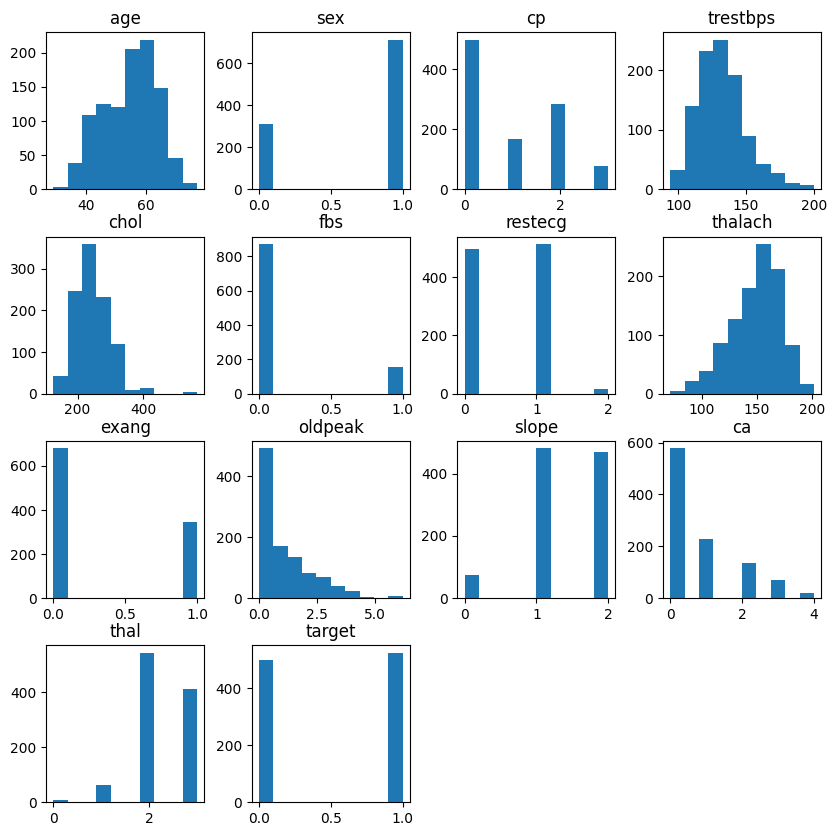

In [17]:
df.hist(figsize=(10,10), grid=False);

In [20]:
# Input & Output
X = df[df.columns[:-1]].values
print(f'The shape of input array is {X.shape}')

y = df['target'].values
print(f'The shape of output array is {y.shape}')

The shape of input array is (1025, 13)
The shape of output array is (1025,)


##  Preprocessings


Splitting

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.15,
    random_state = 54,
    shuffle = True
)

print(f'Shape of train data is {x_train.shape}')
print(f'Shape of test data is {x_test.shape}')
print(f'Shape of train target array is {y_train.shape}')
print(f'Shape of test target array is {y_test.shape}')

Shape of train data is (871, 13)
Shape of test data is (154, 13)
Shape of train target array is (871,)
Shape of test target array is (154,)


Normalization

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
# Scaler
scaler = StandardScaler().fit(x_train)

# Scaling input data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
nb_model = GaussianNB()

# fitting train data on model
nb_model.fit(x_train_scaled, y_train)

GaussianNB()

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
# Scores on train and test data
train_score = nb_model.score(x_train_scaled,y_train)
test_score = nb_model.score(x_test_scaled, y_test)
print(f'The score on train data is {train_score:.4f}')
print(f'The score on test data is {test_score:.4f}', end='\n\n')

# Predicting
train_hat = nb_model.predict(x_train_scaled)
test_hat = nb_model.predict(x_test_scaled)

train_cr = classification_report(y_train, train_hat)
test_cr = classification_report(y_test, test_hat)

print('Classsification report on train data is:\n')
print(train_cr, end='\n\n')
print('Classsification report on test data is:\n')
print(test_cr, end='\n\n')

The score on train data is 0.8186
The score on test data is 0.8571

Classsification report on train data is:

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       428
           1       0.80      0.86      0.83       443

    accuracy                           0.82       871
   macro avg       0.82      0.82      0.82       871
weighted avg       0.82      0.82      0.82       871


Classsification report on test data is:

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        71
           1       0.86      0.88      0.87        83

    accuracy                           0.86       154
   macro avg       0.86      0.86      0.86       154
weighted avg       0.86      0.86      0.86       154




Text(682.7676767676767, 0.5, 'Ground True')

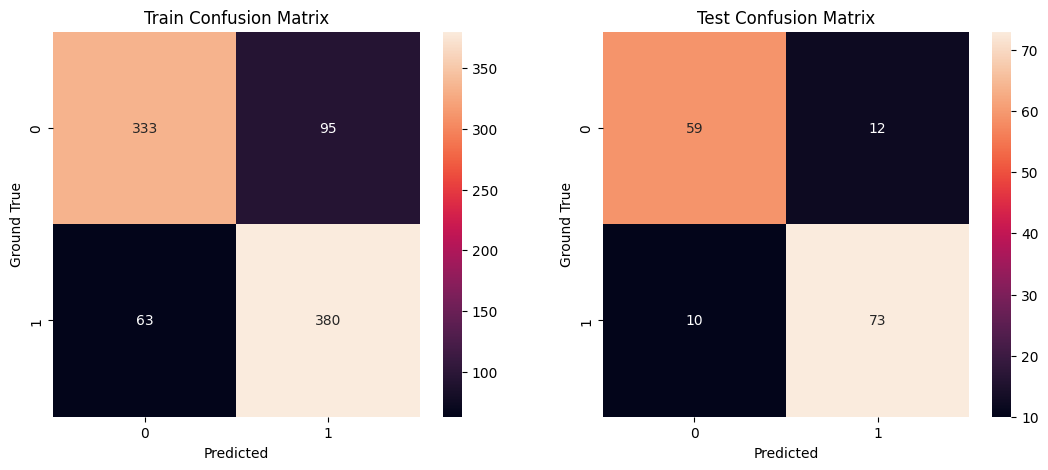

In [38]:
# confusion matrix
cm_train = confusion_matrix(y_train, train_hat)
cm_test = confusion_matrix(y_test, test_hat)

# Plotting CMs
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
sns.heatmap(cm_train, annot=True, fmt='d')
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Ground True')

plt.subplot(1,2,2)
sns.heatmap(cm_test, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Ground True')


## Random data prediction

In [48]:
# random index
np.random.seed(54) # Setting seed to a default amount for reproducibility
random_idx = np.random.randint(0,len(y_test),5 )

# predicting
prediction = test_hat[random_idx]
true_ground = y_test[random_idx]

# printing the outcome
print('The inut data is:')
print(x_test[random_idx,:], end='\n\n')
print(f'Ground true is : {true_ground}')
print(f'Prediction is ;  {prediction}')

The inut data is:
[[ 58.    1.    2.  140.  211.    1.    0.  165.    0.    0.    2.    0.
    2. ]
 [ 63.    0.    0.  108.  269.    0.    1.  169.    1.    1.8   1.    2.
    2. ]
 [ 54.    1.    0.  140.  239.    0.    1.  160.    0.    1.2   2.    0.
    2. ]
 [ 49.    0.    1.  134.  271.    0.    1.  162.    0.    0.    1.    0.
    2. ]
 [ 50.    1.    0.  150.  243.    0.    0.  128.    0.    2.6   1.    0.
    3. ]]

Ground true is : [1 0 1 1 0]
Prediction is ;  [1 0 1 1 0]
